# Creating Data Science Python Package using Jupyter Notebook

![](Images/pythonpackage.jpg)

>**Creating your first data science python package straight from Jupyter Notebook.**

We are going to use the cloud Jupyter Notebook to ease the setting up of the environment and completely focus on creating a package. We have also used Object Orient Programming (OOP) fundamentals like Inheritance, objects, class, magic functions, and that I won't be discussing how each part work. I am sharing my experience of creating Python packages while taking AWS Machine Learning Foundations It took me 10 minutes to create a Python package once I knew who to build it, so practice will make you better at coding packages. 

Have you wondered how Python packages like Scikit-learn, pandas, and NumPy are built? They are all based on OOP to create complex and easy-to-use packages. Why do data scientists need to build python packages? In modern times OOP is a necessity and it helps users to build program and share it with the public or within organizations.  

# General Distribution

So, without wasting time let's dive into the coding and discuss our Parent class Distribution which will be used by **Gaussian** and **Binomial** Classes. We are using the Jupyter notebook magic function ```%%witefile <filename>``` to create python files.

```%%writefile distributions/general.py```

This will create a python file into the distributions folder and to make things simple you need to create a test folder that should contain your test files, a distribution folder that should contain all your package's files, and a data folder that contains a .txt file containing data. 

The **Distribution class** takes 2 arguments, `mean` and `standard deviation`, it also contains the read_data_file function to access the file and store it to the data variable. 

In [ ]:
%%writefile distributions/general.py
class Distribution:
	
	def __init__(self, mu=0, sigma=1):
	
		""" 
		Generic distribution class for calculating and 
		visualizing a probability distribution.
	
		Attributes:
			mean (float) representing the mean value of the distribution
			stdev (float) representing the standard deviation of the distribution
			data_list (list of floats) a list of floats extracted from the data file
		
		"""
		
		self.mean = mu
		self.stdev = sigma
		self.data = []


	def read_data_file(self, file_name):
	
		"""
		Function to read in data from a txt file. The txt file should have
		one number (float) per line. The numbers are stored in the data attribute.
				
		Args:
			file_name (string): name of a file to read from
		
		Returns:
			None
		
		"""
			
		with open(file_name) as file:
			data_list = []
			line = file.readline()
			while line:
				data_list.append(int(line))
				line = file.readline()
		file.close()
	
		self.data = data_list

Overwriting distributions/general.py


## Testing Distribution Class

Everything in this class is working smoothly. We have added mean, standard deviation, and loaded the ```random.txt``` file and you can see the results.

In [ ]:
from distributions.general import Distribution  # importing python file from directory

general1 = Distribution(20, 3)  # creating object with 20 mean, 30 standard deviation
print("Mean: {}, standard deviation: {}".format(general1.mean, general1.stdev))


general1.read_data_file("data/random.txt")  # loading txt file data and checking
print("Data Loaded :", general1.data)

## everything is working perfectly


Mean: 20, standard deviation: 3
Data Loaded : [10, 23, 45, 12, 23, 45, 67, 100, 300, 250, 45, 68, 29, 59, 239, 934, 12, 321, 12, 32, 1]


# Gaussain Distribution

The gaussian distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.  - [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)

![GGraph](Images/220px-Normal_Distribution_PDF.png)

## Mean
The mean of a list of numbers is the sum of all of the numbers divided by the number of numbers. [Mean - Wikipedia](https://en.wikipedia.org/wiki/Mean)
![Picture title](Images/image-20210722-202302.png)

## Standard Deviation
This is a measure of the amount of variation of a set of values using the mean. [The BMJ](https://www.bmj.com/content/312/7047/1654)
![Picture title](Images/image-20210722-202417.png)

## Probability density function
The parameter mu is the mean, while the parameter sigma is the standard deviation. The x is the value in a list.  
![Picture title](Images/image-20210722-202555.png)

## Gaussian Class
Without going deep into how inheritance work and how the magic function works, let's discuss the functions:

1. Initialize the parent class Distribution
2. Create `calculate_mean` function -> **calculate mean from data**
3. Create `calculate_stdev` function  -> **calculate standard deviation from data **
4. Create `plot_histogram` function  -> **display histogram using matplotlib library**
5. Create `pdf` function -> **calculate proabaility density function of data using mean and stdev**
6. Create `plot_histogram_pdf` function -> **plot the normalized histogram of the data and a plot of the probability density function along the same range.**
7. Create magic function ``__add__``  -> **add together two Gaussian distributions objects**
8. Create magic function ``__repr__`` -> **output the characteristics of the Gaussian instance**

In [ ]:
%%writefile distributions/gaussian.py
import math
import matplotlib.pyplot as plt
from .general import Distribution

class Gaussian(Distribution):
	""" 
	Gaussian distribution class for calculating and 
	visualizing a Gaussian distribution.
	
	Attributes:
		mean (float) representing the mean value of the distribution
		stdev (float) representing the standard deviation of the distribution
		data_list (list of floats) a list of floats extracted from the data file
			
	"""
	def __init__(self, mu=0, sigma=1):
		
		Distribution.__init__(self, mu, sigma)
	
		
	
	def calculate_mean(self):
	
		"""
		Function to calculate the mean of the data set.
		
		Args: 
			None
		
		Returns: 
			float: mean of the data set
	
		"""
					
		avg = 1.0 * sum(self.data) / len(self.data)
		
		self.mean = avg
		
		return self.mean



	def calculate_stdev(self, sample=True):

		"""
		Function to calculate the standard deviation of the data set.
		
		Args: 
			sample (bool): whether the data represents a sample or population
		
		Returns: 
			float: standard deviation of the data set
	
		"""

		if sample:
			n = len(self.data) - 1
		else:
			n = len(self.data)
	
		mean = self.calculate_mean()
	
		sigma = 0
	
		for d in self.data:
			sigma += (d - mean) ** 2
		
		sigma = math.sqrt(sigma / n)
	
		self.stdev = sigma
		
		return self.stdev
		
		
		
	def plot_histogram(self):
		"""
		Function to output a histogram of the instance variable data using 
		matplotlib pyplot library.
		
		Args:
			None
			
		Returns:
			None
		"""
		plt.hist(self.data)
		plt.title('Histogram of Data')
		plt.xlabel('data')
		plt.ylabel('count')
		
		
		
	def pdf(self, x):
		"""
		Probability density function calculator for the gaussian distribution.
		
		Args:
			x (float): point for calculating the probability density function
			
		
		Returns:
			float: probability density function output
		"""
		
		return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
		

	def plot_histogram_pdf(self, n_spaces = 50):

		"""
		Function to plot the normalized histogram of the data and a plot of the 
		probability density function along the same range
		
		Args:
			n_spaces (int): number of data points 
		
		Returns:
			list: x values for the pdf plot
			list: y values for the pdf plot
			
		"""
		
		mu = self.mean
		sigma = self.stdev

		min_range = min(self.data)
		max_range = max(self.data)
		
		 # calculates the interval between x values
		interval = 1.0 * (max_range - min_range) / n_spaces

		x = []
		y = []
		
		# calculate the x values to visualize
		for i in range(n_spaces):
			tmp = min_range + interval*i
			x.append(tmp)
			y.append(self.pdf(tmp))

		# make the plots
		fig, axes = plt.subplots(2,sharex=True)
		fig.subplots_adjust(hspace=.5)
		axes[0].hist(self.data, density=True)
		axes[0].set_title('Normed Histogram of Data')
		axes[0].set_ylabel('Density')

		axes[1].plot(x, y)
		axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
		axes[0].set_ylabel('Density')
		plt.show()

		return x, y
		
	def __add__(self, other):
		
		"""
		Function to add together two Gaussian distributions
		
		Args:
			other (Gaussian): Gaussian instance
			
		Returns:
			Gaussian: Gaussian distribution
			
		"""
		
		result = Gaussian()
		result.mean = self.mean + other.mean
		result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
		
		return result
		
		
	def __repr__(self):
	
		"""
		Function to output the characteristics of the Gaussian instance
		
		Args:
			None
		
		Returns:
			string: characteristics of the Gaussian
		
		"""
		
		return "mean {}, standard deviation {}".format(self.mean, self.stdev)

Overwriting distributions/gaussian.py


## Experimenting

Testing ``__repr__`` magic function.

In [ ]:
from distributions.gaussian import Gaussian

Gaussian(20,3) ## checking the object magic function

mean 20, standard deviation 3

Initializing gaussian1 object with 25 mean and 2 standard deviations and then reading random.txt file from data folder.

In [ ]:
gaussian1 = Gaussian(25, 2)
gaussian1.read_data_file('data/random.txt')

Calculating probability function on 25 means and 2 Stdev on data 

Then, calculating the mean and Stdev of data changes the original mean to 125.1 and Stdev to 210.77 and eventually changing our probability density function.  

In [ ]:
print("Before pdf : ", round(gaussian1.pdf(25), 5))  # checking pdf on initial mean and stdev

print("mean :", round(gaussian1.calculate_mean(), 2))  # calculating mean of data
print("Stdev :", round(gaussian1.calculate_stdev(), 2))  # calculating stdev of data

print("After pdf : ", round(gaussian1.pdf(75), 5))  # calcuation pdf of data


Before pdf :  0.19947
mean : 125.1
Stdev : 210.77
After pdf :  0.00184


Plotting histogram with PDF looks Awsome. 

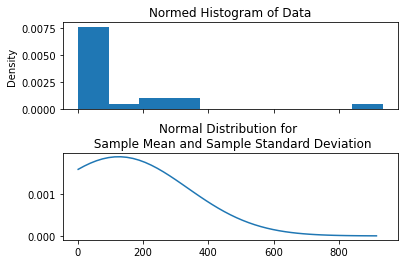

In [ ]:
gaussian1.plot_histogram_pdf();

## Creating Gaussian Class Test File

>Test-First is a great tool. It creates better understanding and productivity in the team. The result is high-quality code – both in terms of early success in finding bugs and implementing features correctly. - Gil Zilberfeld

## The unittest
The unittest unit testing framework was originally inspired by JUnit and has a similar flavor as major unit testing frameworks in other languages. It supports test automation, sharing of setup and shutdown code for tests, aggregation of tests into collections, and independence of the tests from the reporting framework, see the [Documentation](https://docs.python.org/3/library/unittest.html). 

We are going to use the unittest library to test all of our functions so that in the future if we make any changes we can detect errors within few seconds. 

Creating TestGaussianClass and has all the functions to test the functions in Gaussian class. We have used the assertEqual method to hack the validity of functions. I have tested these values myself and then added them individually to test every possibility.  

In [ ]:
%%writefile test/test_gaussian.py

import unittest
from distributions.gaussian import Gaussian

class TestGaussianClass(unittest.TestCase):
    def setUp(self):
        self.gaussian = Gaussian(35, 6)
        self.gaussian.read_data_file('data/random.txt')

    def test_initialization(self): 
        self.assertEqual(self.gaussian.mean, 35, 'incorrect mean')
        self.assertEqual(self.gaussian.stdev, 6, 'incorrect standard deviation')

    def test_readdata(self):
        self.assertEqual(self.gaussian.data,\
         [10, 23, 45, 12, 23, 45, 67, 100, 300, 250, 45, 68, 29, 59, 239, 934, 12, 321, 12, 32, 1], 'data not read in correctly')

    def test_meancalculation(self):
        self.assertEqual(self.gaussian.calculate_mean(),\
         sum(self.gaussian.data) / float(len(self.gaussian.data)), 'calculated mean not as expected')

    def test_stdevcalculation(self):
        self.assertEqual(round(self.gaussian.calculate_stdev(), 2), 210.77, 'sample standard deviation incorrect')
        self.assertEqual(round(self.gaussian.calculate_stdev(0), 2), 205.69, 'population standard deviation incorrect')

    def test_pdf(self):
        self.assertEqual(round(self.gaussian.pdf(25), 5), 0.01658,\
         'pdf function does not give expected result') 
        self.gaussian.calculate_mean()
        self.gaussian.calculate_stdev()
        self.assertEqual(round(self.gaussian.pdf(75), 5), 0.00184,\
        'pdf function after calculating mean and stdev does not give expected result')      

    def test_add(self):
        gaussian_one = Gaussian(25, 3)
        gaussian_two = Gaussian(30, 4)
        gaussian_sum = gaussian_one + gaussian_two
        
        self.assertEqual(gaussian_sum.mean, 55)
        self.assertEqual(gaussian_sum.stdev, 5)

if __name__ == '__main__':
    unittest.main()

Overwriting test/test_gaussian.py


## Running Test
Let's run our test file from the test folder using !python. As you can see all tests have passed. I did get multiple errors first and it helped me better understand how my Gaussian class is working at every level. 

In [ ]:
!python test/test_gaussian.py

......
----------------------------------------------------------------------
Ran 6 tests in 0.002s

OK


# Binomial Distribution
The binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes-no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). [Binomial distribution - Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)

![bi](Images/1200px-Binomial_distribution_pmf.svg.png)

## Mean
![Picture title](Images/image-20210722-200158.png)

In other words, a fair coin has a probability of a positive outcome (heads) p = 0.5. If you flip a coin 20 times, the mean would be 20 * 0.5 = 10; you'd expect to get 10 heads.

## Variance
![Picture title](Images/image-20210722-200347.png)


## Standard Deviation
![Picture title](Images/image-20210722-200411.png)
In other words, the standard deviation is the square root of the variance.

## Probability density function
![Picture title](Images/image-20210722-200427.png)


# Binomial Class
We will be using the mathematical functions mention above to create mean, standard deviation, and probability density functions. We have done the hard work in Gaussian class now we just need to follow the pattern. 

1. Initialize the probability and size variable  - > **p,n**
2. Initialize the parent class Distribution - > **calculating mean and Stdev and adding it to the parent class.**
3. Create `calculate_mean` function -> **calculate mean from data**
4. Create `calculate_stdev` function -> **calculate standard deviation from data**
5. Create `replace_stats_with_data` function - > **That will calculate, probability and size from data and then update new mean and standard deviation.**
6. Create `plot_bar` function -> **display bar chart using matplotlib library**
7. Create `pdf` function -> **calculate probability density function of data using mean and stdev**
8. Create `plot_bar_pdf` function -> **plot the pdf of the binomial distribution**
9. Create magic function `__add__` -> **add together two Gaussian distributions objects**
10. Create magic function `__repr__` -> **output the characteristics of the Gaussian instance**

In [ ]:
%%writefile distributions/binomial.py 

import math
import matplotlib.pyplot as plt
from .general import Distribution

class Binomial(Distribution):
    """ Binomial distribution class for calculating and 
    visualizing a Binomial distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats to be extracted from the data file
        p (float) representing the probability of an event occurring
        n (int) the total number of trials
    
    """         
    
    def __init__(self, prob=.5, size=20):
        
        self.p = prob
        self.n = size
        mu = self.calculate_mean()
        sigma = self.calculate_stdev()
        Distribution.__init__(self, mu, sigma)
         
                   
    
    def calculate_mean(self):
    
        """Function to calculate the mean from p and n
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
        self.mean = self.p*self.n
        
        return self.mean        
        



    def calculate_stdev(self):

        """Function to calculate the standard deviation from p and n.
        
        Args: 
            None
        
        Returns: 
            float: standard deviation of the data set
    
        """
        self.stdev = math.sqrt(self.n * self.p * (1 - self.p))
        
        return self.stdev
        
        
        
        
    def replace_stats_with_data(self):
    
        """Function to calculate p and n from the data set
        
        Args: 
            None
        
        Returns: 
            float: the p value
            float: the n value
    
        """        
        
        self.n = len(self.data)
        self.p = sum(self.data)/len(self.data)
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev()
    
        return self.p,self.n
        
        
    def plot_bar(self):
        """Function to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
        plt.bar(x = ['0', '1'], height = [(1 - self.p) * self.n, self.p * self.n])
        plt.title('Bar Chart of Data')
        plt.xlabel('outcome')
        plt.ylabel('count')    
        
               
        
    def pdf(self, k):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            k (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
        a = math.factorial(self.n) / (math.factorial(k) * (math.factorial(self.n - k)))
        b = (self.p ** k) * (1 - self.p) ** (self.n - k)
        
        return a * b
               

    def plot_bar_pdf(self):

        """Function to plot the pdf of the binomial distribution
        
        Args:
            None
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
            
        """
    
        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(self.n + 1):
            x.append(i)
            y.append(self.pdf(i))
        
        # make the plots
        plt.bar(x, y)
        plt.title('Distribution of Outcomes')
        plt.ylabel('Probability')
        plt.xlabel('Outcome')

        plt.show()

        return x, y
                
    def __add__(self, other):
        
        """Function to add together two Binomial distributions with equal p
        
        Args:
            other (Binomial): Binomial instance
            
        Returns:
            Binomial: Binomial distribution
            
        """
        
        try:
            assert self.p == other.p, 'p values are not equal'
        except AssertionError as error:
            raise
        
      
        result = Binomial()
        result.p = self.p
        result.n = self.n + other.n 
        result.mean = self.calculate_mean()
        result.stdev = self.calculate_stdev()
        return result        
        pass
        
        
    def __repr__(self):
    
        """Function to output the characteristics of the Binomial instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """
        
        return "mean {}, standard deviation {}, p {}, n {}".format(self.mean,self.stdev,self.p,self.n)
        pass


Overwriting distributions/binomial.py


## Experimenting
Testing  ``__repr__`` magic function

In [ ]:
from distributions.binomial import Binomial

Binomial(0.6,300)

mean 180.0, standard deviation 8.48528137423857, p 0.6, n 300

Testing Binomial object and ``read_data_file``

In [ ]:
B1 = Binomial(0.4, 20) # creating object with 0.4 probability, 30 size
print("Mean: {}, standard deviation: {}".format(B1.mean, round(B1.stdev,2)))


B1.read_data_file("data/binary.txt") # loading txt file data and checking 
print("Data Loaded :", B1.data)

Mean: 8.0, standard deviation: 2.19
Data Loaded : [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]


Testing pdf of the initial value of **p 0.4** and **n 20**

Then, using replace_stats_with_data to calculate `p` and `n` of data and then recalculating `pdf`.

In [ ]:
print("Initial PDF",round(B1.pdf(5), 5))

p, n = B1.replace_stats_with_data()
print("Data p: {}, n: {}".format(round(p,3),n))

print("Data PDF",round(B1.pdf(5), 5))

Initial PDF 0.07465
Data p: 0.471, n: 17
Data PDF 0.06923


Testing bar plot

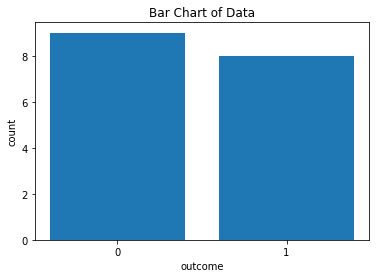

In [ ]:
B1.plot_bar()

Testing Probability Density Function bar plot.

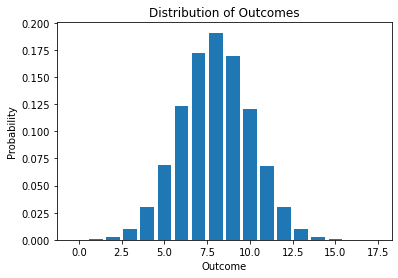

In [ ]:
B1.plot_bar_pdf();

## Binomial Class Test Function

Again, we are going to use the ``unittest`` library to test all of our functions so that in the future if we make any changes we can detect errors within few seconds.

Creating ``TestBinomialClass`` and has all the functions to test the functions in **Binomial** class. We have used the ``assertEqual method`` to hack the validity of functions. I have tested these values myself and then added them individually to test every possibility.  

In [ ]:
%%writefile test/test_binomial.py

import unittest
from distributions.binomial import Binomial

class TestBinomialClass(unittest.TestCase):
    def setUp(self):
        self.binomial = Binomial(0.4, 20)
        self.binomial.read_data_file('data/binary.txt')

    def test_initialization(self):
        self.assertEqual(self.binomial.p, 0.4, 'p value incorrect')
        self.assertEqual(self.binomial.n, 20, 'n value incorrect')

    def test_readdata(self):
        self.assertEqual(self.binomial.data,\
         [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], 'data not read in correctly')
    
    def test_calculatemean(self):
        mean = self.binomial.calculate_mean()
        self.assertEqual(mean, 8)
    
    def test_calculatestdev(self):
        stdev = self.binomial.calculate_stdev()
        self.assertEqual(round(stdev,2), 2.19)
        
    def test_replace_stats_with_data(self):
        p, n = self.binomial.replace_stats_with_data()
        self.assertEqual(round(p,3), 0.471)
        self.assertEqual(n, 17)
        
    def test_pdf(self):
        self.assertEqual(round(self.binomial.pdf(5), 5), 0.07465)
        self.assertEqual(round(self.binomial.pdf(3), 5), 0.01235)
    
        self.binomial.replace_stats_with_data()
        self.assertEqual(round(self.binomial.pdf(5), 5), 0.06923)
        self.assertEqual(round(self.binomial.pdf(3), 5), 0.00963)

    def test_add(self):
        binomial_one = Binomial(.4, 20)
        binomial_two = Binomial(.4, 60)
        binomial_sum = binomial_one + binomial_two
        
        self.assertEqual(binomial_sum.p, .4)
        self.assertEqual(binomial_sum.n, 80)
        
    
if __name__ == '__main__':
    unittest.main()

Overwriting test/test_binomial.py


## Running Test
Running the test_binomial.py shows that no error was found during testing. 

In [ ]:
!python test/test_binomial.py

.......
----------------------------------------------------------------------
Ran 7 tests in 0.002s

OK


# Creating *____init____.py* Function

We need to create ``__init__.py`` file in the distributions folder to initial the Classes within the python file. This will help us call specific classes directly. 

We have inintaite Binomial and Gaussian class.

In [ ]:
%%writefile distributions/__init__.py

from .binomial import Binomial
from .gaussian import Gaussian

Writing distributions/__init__.py


# Creating _setup.py_ Function
setup.py function giving all necessary information about the package. It uses setuptools library to create package name, version, description, author name, etc. We have to create this file outside the distribution folder.

In [ ]:
%%writefile setup.py

from setuptools import setup

setup(name='distributions',
      version='0.2',
      description='Gaussian and Binomial distributions',
      packages=['distributions'],
      author = "Abid Ali Awan",
      author_email = "abidaliawan@rocketmail.com",
      zip_safe=False)


Writing setup.py


# Directory
You can see how your directory should look like.

![Picture title](Images/image-20210724-124844.png)

# Installing distributions Package
Let's install the package by going into the Linux terminal and going into the work directory by using a cd.  Then, use ``pip install .`` or ``pip install -U .``

```
(venv) root@deepnote:~/work # pip install -U .

```

```
Processing /work
Building wheels for collected packages: distributions
  Building wheel for distributions (setup.py) ... done
  Created wheel for distributions: filename=distributions-0.2-py3-none-any.whl size=4800 sha256=39bc76cbf407b2870caea42b684b05efc15641c0583f195f36a315b3bc4476da
  Stored in directory: /tmp/pip-ephem-wheel-cache-ef8q6wh9/wheels/95/55/fb/4ee852231f420991169c6c5d3eb5b02c36aea6b6f444965b4b
Successfully built distributions
Installing collected packages: distributions
  Attempting uninstall: distributions
    Found existing installation: distributions 0.2
    Uninstalling distributions-0.2:
      Successfully uninstalled distributions-0.2
Successfully installed distributions-0.2
```

# Testing our Package
Let's test our package directly from the terminal and it seems like everything is working fine. Well done you have created your first python package. 

```
>>> from distributions import Gaussian
>>> from distributions import Binomial
>>> 
>>> print(Gaussian(20,6))
mean 20, standard deviation 6
>>> print(Binomial(0.4,50))
mean 20.0, standard deviation 3.4641016151377544, p 0.4, n 50
>>> 
```

Do ask me questions in the comments and that's it, I hope you enjoyed my article.💖  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26f0292e-10a2-408a-a3fb-4c91f8f01f75' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>